## Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

pd.set_option('display.max_columns', None)

## Exploratory Data Analysis

In [2]:
df_arima = pd.read_excel('..\dataset\Sample - Superstore.xls')

In [3]:
df_arima

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
def filter_df(df):
    df = df[['Order Date', 'Category', 'Sub-Category', 'Product Name', 'Quantity']].copy()
    df['Year_Month'] = df['Order Date'].dt.strftime('%Y-%m')
    df = df.drop(columns=['Order Date'])

    return df

def plot (df, cat):
    df = df.groupby(['Year_Month', cat], as_index=False)['Quantity'].sum().copy()
    df = df.set_index('Year_Month')

    fig = px.line(
        df, 
        x=df.index, 
        y='Quantity', 
        color=cat,
        markers=True,
        title='Quantity of products sold by ' + cat)
    fig.show()

def count_unique_month (df, cat):
    df = df.groupby(['Year_Month', cat], as_index=False)['Quantity'].sum().copy()
    df = df.groupby(cat)['Year_Month'].nunique().reset_index(name='Count_Month').sort_values(by='Count_Month', ascending=False)

    return df

def filter_by_product(df, cat, product):
    df_model = df.groupby(['Year_Month', cat], as_index=False)['Quantity'].sum().copy()
    df_model = df_model[df_model[cat]==product].set_index('Year_Month').drop(columns=[cat])

    return df_model
    

Inicie a análise exploratória dos dados do macro para o micro, ou seja, primeiramente filtrei somente as colunas 'Category', 'Sub-Category', 'Product-Name', 'Quantity' e 'Order Date', não me preocupando nesse momento com as outras features, como 'Country', 'State', 'City', 'Region', etc.
É possível que o padrão de vendas de um determinado produto seja diferente de acordo com a região, por exemplo, isso é um hipótese que deveria ser testada posteriormente.

In [6]:
df_models = filter_df(df_arima)

df_models

,Category,Sub-Category,Product Name,Quantity,Year_Month
0,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,2016-11
1,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,2016-11
2,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,2016-06
3,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,2015-10
4,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,2015-10
...,...,...,...,...,...
9989,Furniture,Furnishings,Ultra Door Pull Handle,3,2014-01
9990,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,2017-02
9991,Technology,Phones,Aastra 57i VoIP phone,2,2017-02
9992,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,2017-02


### Category

Comecei pelo nível mais alto, a categoria.

In [7]:
count_unique_month(df_models, 'Category')

,Category,Count_Month
0,Furniture,48
1,Office Supplies,48
2,Technology,48


O dataframe acima mostra que todas as categorias tiveram pelo menos uma venda em cada mês ao longo dos 4 anos de dados. 

In [8]:
filter_by_product(df_models, 'Category', 'Technology').head()

,Quantity
Year_Month,
2014-01,45
2014-02,33
2014-03,84
2014-04,110
2014-05,88


In [9]:
plot(df_models, 'Category')

c:\Users\weslley.santos\Documents\CASE-IA\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


No gráfico acima pode-ser ver que o volume de vendas das três categorias segue um padrão sazonal, com picos de vendas no final do ano e quedas no início do ano seguinte. Além disso, é possível notar que o volume de vendas de todas as categorias aumentou ao longo dos anos.

### Sub-Category

In [10]:
count_unique_month(df_models, 'Sub-Category')

,Sub-Category,Count_Month
0,Accessories,48
1,Appliances,48
14,Storage,48
13,Phones,48
12,Paper,48
10,Labels,48
9,Furnishings,48
16,Tables,48
5,Chairs,48
3,Binders,48


Já no caso da feature 'Sub-Category', nem todos os produtos tiveram vendas em todos os meses. Por exemplo, a sub-categoria 'Copiers' não teve nenhuma venda em 16 dos 48 meses analisados. Isso é um problema, pois a falta de dados em determinados meses pode prejudicar a análise da série temporal. Nesse caso, seria interessante olhar detalhadamente cada um dos produtos que não tiveram vendas em determinados meses e pensar em uma estratégia para lidar com os dados faltantes.

In [11]:
filter_by_product(df_models, 'Sub-Category', 'Phones').head()

,Quantity
Year_Month,
2014-01,31
2014-02,11
2014-03,37
2014-04,64
2014-05,54


In [12]:
plot(df_models, 'Sub-Category')

c:\Users\weslley.santos\Documents\CASE-IA\venv\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Product Name

In [13]:
count_unique_month(df_models, 'Product Name')

,Product Name,Count_Month
537,Easy-staple paper,32
1499,Staples,30
1493,Staple envelope,30
1500,Staples in misc. colors,18
259,Avery Non-Stick Binders,14
...,...,...
1725,Xerox 1938,1
208,Avery 5,1
656,"Fellowes Smart Surge Ten-Outlet Protector, Pla...",1
1030,Loose Memo Sheets,1


Por fim, a feature de mais baixo nível, 'Product Name', possui uma grande variedade de produtos que foram vendidos somente uma vez ao longo dos 4 anos de dados, o que torna impossível a análise de séries temporais para esses produtos. 

In [14]:
filter_by_product(df_models, 'Product Name', 'Avery 5').head()

,Quantity
Year_Month,
2017-04,2


Dado o exposto, decidi por focar a análise no nível mais alto, ou seja, na feature 'Category'.

# Models

## ARIMA

### Category - Technology

In [92]:
df_cat_tech = filter_by_product(df_models, 'Category', 'Technology')

df_cat_tech.reset_index(inplace=True)

df_cat_tech['Year_Month'] = pd.to_datetime(df_cat_tech['Year_Month'])

df_cat_tech.set_index('Year_Month', inplace=True)

df_cat_tech.head()

,Quantity
Year_Month,
2014-01-01,45
2014-02-01,33
2014-03-01,84
2014-04-01,110
2014-05-01,88


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=293.173, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=294.321, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=288.556, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=287.562, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=289.003, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=289.447, Time=0.05 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=293.078, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.664 seconds


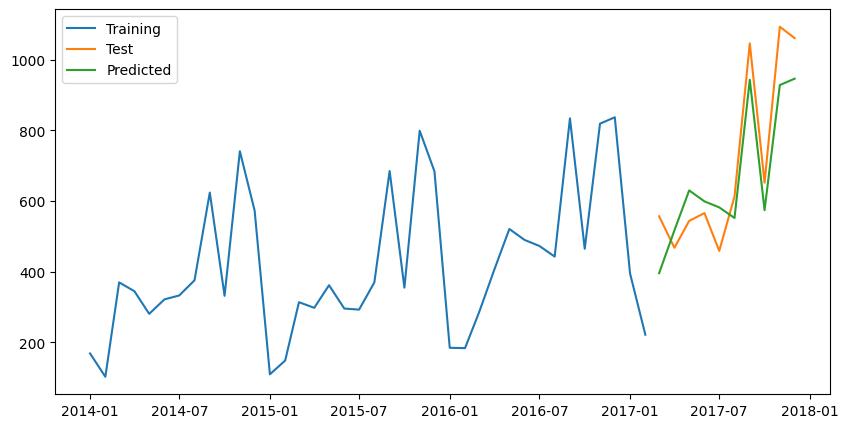

106.15469047023666


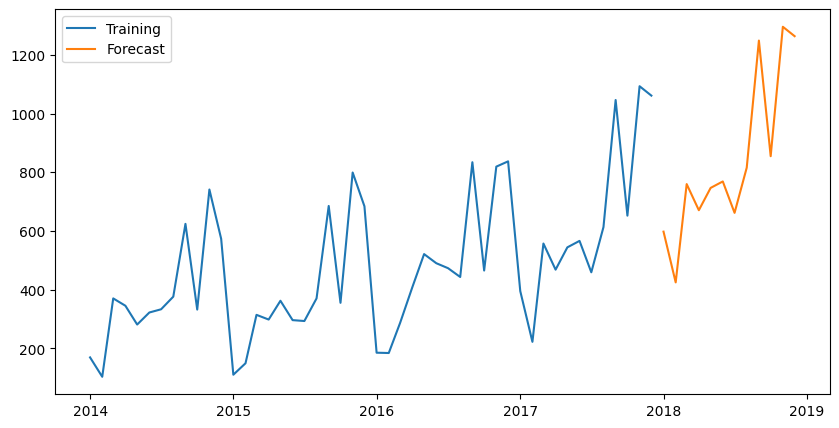

In [98]:

from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Dataframe
df_arima = df_cat_tech.copy()

# Train test split
train_size = int(len(df_arima) * 0.8)
train, test = df_arima[:train_size], df_arima[train_size:]

# Auto Arima Model
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, 
                         max_p=5, max_d=5, max_q=5, start_P=0, 
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True, 
                         error_action='warn', trace=True, 
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

# Predictions
predictions = pd.DataFrame(arima_model.predict(n_periods=len(test)), index=test.index)
predictions.columns = ['predicted_quantity']

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(rmse)

# Forecast
n_periods = 12
arima_model.fit(df_arima)
forecast = arima_model.predict(n_periods=n_periods)
forecast = pd.DataFrame(forecast, index = pd.date_range(df_arima.index[-1], periods = n_periods+1, freq='MS')[1:], columns=['predicted_quantity'])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df_arima, label='Training')
plt.plot(forecast, label='Forecast')
plt.legend(loc='upper left')
plt.show()

# Save the best model to a pickle file
import pickle
pickle.dump(arima_model, open('arima_model_tech.pkl', 'wb'))

### Category - Office Supplies

In [96]:
df_cat_supplies = filter_by_product(df_models, 'Category', 'Office Supplies')

df_cat_supplies.reset_index(inplace=True)

df_cat_supplies['Year_Month'] = pd.to_datetime(df_cat_supplies['Year_Month'])

df_cat_supplies.set_index('Year_Month', inplace=True)

df_cat_supplies.head()

,Quantity
Year_Month,
2014-01-01,169
2014-02-01,103
2014-03-01,370
2014-04-01,345
2014-05-01,281


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=293.173, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=294.321, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=288.556, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=287.562, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=289.003, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=289.447, Time=0.04 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=293.078, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.669 seconds


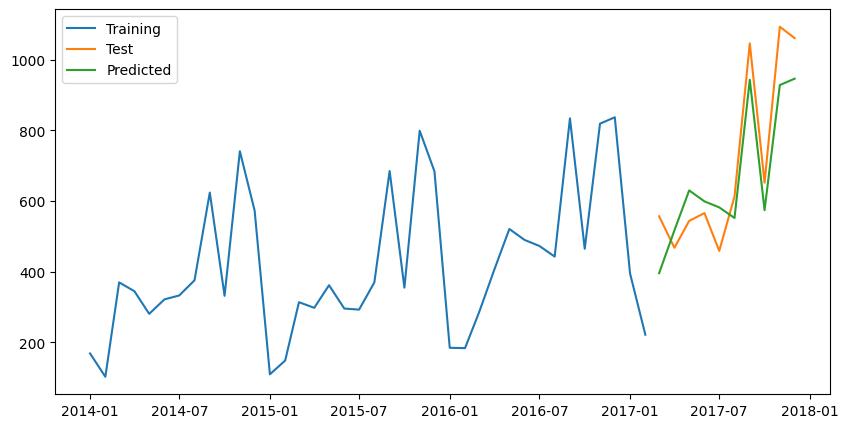

106.15469047023666


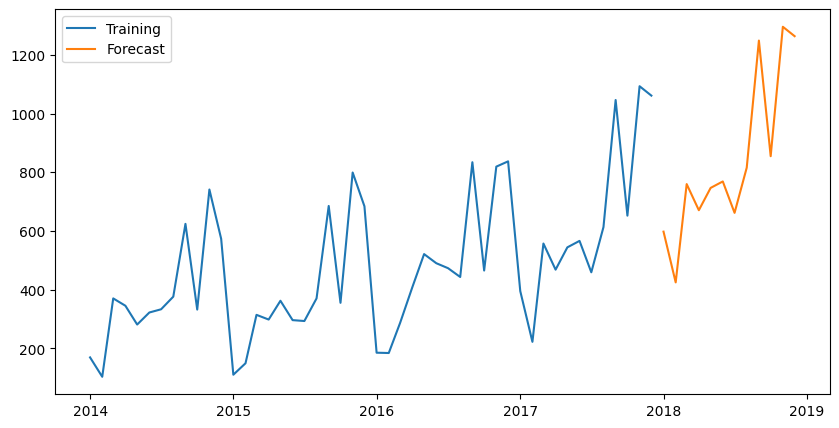

In [97]:

from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Dataframe
df_arima = df_cat_supplies.copy()

# Train test split
train_size = int(len(df_arima) * 0.8)
train, test = df_arima[:train_size], df_arima[train_size:]

# Auto Arima Model
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, 
                         max_p=5, max_d=5, max_q=5, start_P=0, 
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True, 
                         error_action='warn', trace=True, 
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

# Predictions
predictions = pd.DataFrame(arima_model.predict(n_periods=len(test)), index=test.index)
predictions.columns = ['predicted_quantity']

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(rmse)

# Forecast
n_periods = 12
arima_model.fit(df_arima)
forecast = arima_model.predict(n_periods=n_periods)
forecast = pd.DataFrame(forecast, index = pd.date_range(df_arima.index[-1], periods = n_periods+1, freq='MS')[1:], columns=['predicted_quantity'])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df_arima, label='Training')
plt.plot(forecast, label='Forecast')
plt.legend(loc='upper left')
plt.show()

# Save the best model to a pickle file
import pickle
pickle.dump(arima_model, open('arima_model_supplies.pkl', 'wb'))

### Category - Furniture

In [99]:
df_cat_furniture = filter_by_product(df_models, 'Category', 'Furniture')

df_cat_furniture.reset_index(inplace=True)

df_cat_furniture['Year_Month'] = pd.to_datetime(df_cat_furniture['Year_Month'])

df_cat_furniture.set_index('Year_Month', inplace=True)

df_cat_furniture.head()

,Quantity
Year_Month,
2014-01-01,70
2014-02-01,23
2014-03-01,131
2014-04-01,81
2014-05-01,97


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=270.477, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=258.251, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=263.455, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=260.725, Time=0.54 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=264.696, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=258.488, Time=0.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=260.183, Time=0.10 sec

Best model:  ARIMA(1,1,0)(1,1,0)[12]          
Total fit tim

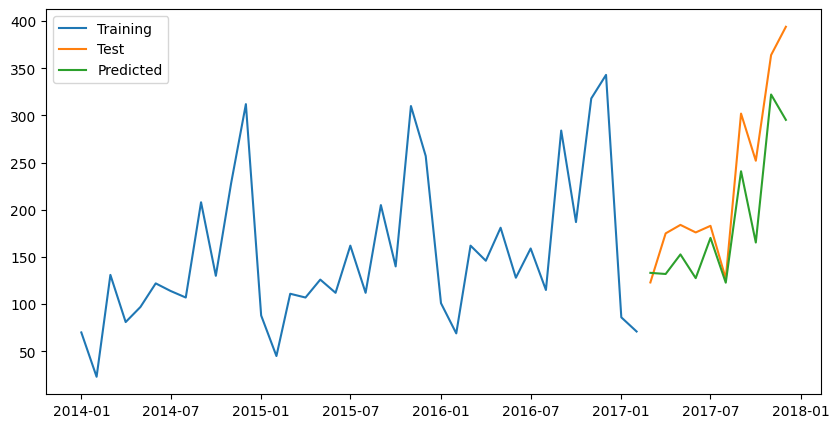

53.100771869511554


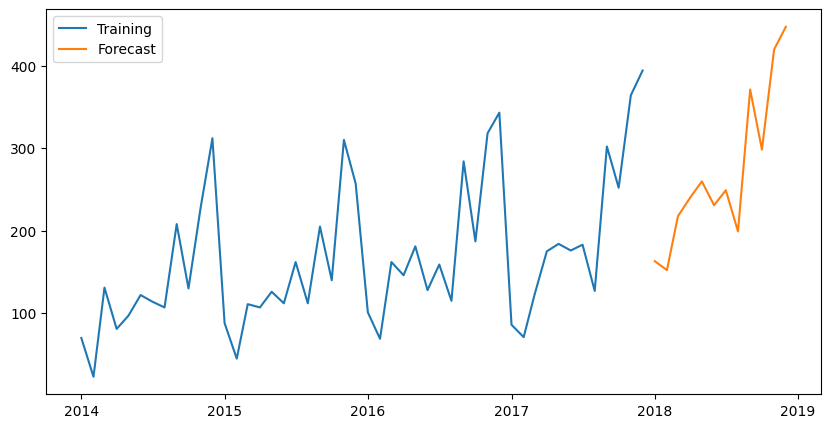

In [100]:

from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Dataframe
df_arima = df_cat_furniture.copy()

# Train test split
train_size = int(len(df_arima) * 0.8)
train, test = df_arima[:train_size], df_arima[train_size:]

# Auto Arima Model
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, 
                         max_p=5, max_d=5, max_q=5, start_P=0, 
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True, 
                         error_action='warn', trace=True, 
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

# Predictions
predictions = pd.DataFrame(arima_model.predict(n_periods=len(test)), index=test.index)
predictions.columns = ['predicted_quantity']

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(rmse)

# Forecast
n_periods = 12
arima_model.fit(df_arima)
forecast = arima_model.predict(n_periods=n_periods)
forecast = pd.DataFrame(forecast, index = pd.date_range(df_arima.index[-1], periods = n_periods+1, freq='MS')[1:], columns=['predicted_quantity'])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df_arima, label='Training')
plt.plot(forecast, label='Forecast')
plt.legend(loc='upper left')
plt.show()

# Save the best model to a pickle file
import pickle
pickle.dump(arima_model, open('arima_model_furniture.pkl', 'wb'))